In [1]:
import tensorflow as tf
import numpy as np


In [2]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)


In [3]:
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])


2021-12-13 08:23:00.354185: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)


In [5]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")


Comenzando entrenamiento...
Modelo entrenado!


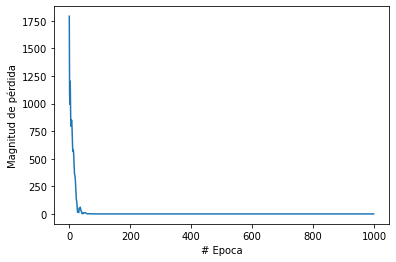

In [6]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])


In [7]:
print("Hagamos una predicción!")
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + " fahrenheit!")


Hagamos una predicción!
El resultado es [[211.74736]] fahrenheit!


In [8]:
print("Variables internas del modelo")
# print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())


Variables internas del modelo
[array([[-0.01147388,  0.31718242,  0.453879  ]], dtype=float32), array([-2.6301353,  3.0424018,  3.058406 ], dtype=float32)]
[array([[ 0.53657895, -1.0972192 ,  1.1268741 ],
       [-0.9327912 ,  1.1466252 , -0.57107306],
       [-0.61673385,  0.9706613 , -0.8669174 ]], dtype=float32), array([-3.0766776,  3.090082 , -3.0800898], dtype=float32)]
[array([[-0.891216 ],
       [ 0.9609381],
       [-0.841435 ]], dtype=float32), array([3.0166528], dtype=float32)]
